# <u>Self Practice 4</u>
Foundation of Machine Learning
***
Date: 4th November 2019<br>
Authored: Samuel Natamihardja<br>
Company: Home Credit Indonesia

##### Instructions:

All the task below will be answered using the given dataset which is provided in the e-Learning System
Dataset is a historical flight data in Malaysia from Oct 2018 – Nov 2018
Data consist of information of flight such as:
1. Date of flight
2. Date of arrival
3. Departure Delay
4. Tail Number
5. Airline Name
6. Departure Location
7. Arrival Location
8. Flight Number
9. Delay
You can add any outsource data to help your task, but you need to put the source of the data in the
glossary

***

There are 3 models that you have to make:
1. Linear Regression
2. Logistic Regression
3. 1 Supervised model you choose

***

Task
1. Provide travel recommendation to passenger (best time to take a flight or best airline), so they will
not get caught in delay. Each recommendation has to be supported by at least 1 graph
2. Create a model to estimate the delay duration ( Linear Regression )
3. Create a model to predict delay > 60 min ( Logistic regression and another supervised model you
choosing )
4. Did you do some feature engineering on the dataset ? if yes, please give the reason for each
feature you created
5. Using those models predict delay that will happened in December for delay >60

***

### <u>Import Python Modules</u>

In [2]:
import pandas as pd

import seaborn as sns

## <u>Section 1: Data Preparation</u>

In [3]:
df_train = pd.read_csv('dataset/training_dataset.csv')
df_test = pd.read_csv('dataset/test_dataset.csv')

df_all = pd.concat([df_train,df_test])
df_all.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


In [4]:
(row, col) = df_all.shape
print('Dataframe consist of',row,'rows and', col, 'columns.')

Dataframe consist of 152625 rows and 26 columns.


#### Duplicate checking

In [5]:
for column in df_all:
    print(column,':')
    print(df_all[column].duplicated().value_counts())
    print()

id :
False    152625
Name: id, dtype: int64

number :
True     150035
False      2590
Name: number, dtype: int64

airline :
True     152520
False       105
Name: airline, dtype: int64

airline_name :
True     152520
False       105
Name: airline_name, dtype: int64

scheduled_departure_time :
True     135126
False     17499
Name: scheduled_departure_time, dtype: int64

scheduled_arrival_time :
True     133465
False     19160
Name: scheduled_arrival_time, dtype: int64

departure_airport_city :
True     152609
False        16
Name: departure_airport_city, dtype: int64

departure_airport_code :
True     152608
False        17
Name: departure_airport_code, dtype: int64

departure_airport_country :
True     152624
False         1
Name: departure_airport_country, dtype: int64

departure_airport_gate :
True     152435
False       190
Name: departure_airport_gate, dtype: int64

departure_airport_name :
True     152608
False        17
Name: departure_airport_name, dtype: int64

departure_airport

Since there's no duplicate value that should be concerned, we will skip dropping duplicate value in the data preprocessing step.

#### Null checking

In [6]:
df_null = df_all.isnull().sum()
df_null = df_null[df_null >0]
print('Columns:')
display(df_null.sort_values(ascending=False))



for x in df_null.sort_values(ascending=False).index:
    print(x,':', round((df_all[df_all[x].isnull()].shape[0]/row)*100,2))
    
print('Missing values percentage: ', round((df_all[(df_all['scheduled_arrival_time'].isnull()) 
       | (df_all['departure_airport_gate'].isnull())
       | (df_all['departure_airport_terminal'].isnull())
       | (df_all['arrival_airport_gate'].isnull())
       | (df_all['arrival_airport_terminal'].isnull())
       | (df_all['flight_equipment_iata'].isnull())
       | (df_all['flight_equipment_name'].isnull())
       | (df_all['flight_duration'].isnull())      
      ].shape[0]/df_all.shape[0])*100,2),'% from whole data.')





Columns:


arrival_airport_gate          137275
arrival_airport_terminal       79410
departure_airport_gate         60619
departure_airport_terminal     56588
flight_equipment_name             22
flight_equipment_iata             22
scheduled_arrival_time             7
flight_duration                    5
dtype: int64

arrival_airport_gate : 89.94
arrival_airport_terminal : 52.03
departure_airport_gate : 39.72
departure_airport_terminal : 37.08
flight_equipment_name : 0.01
flight_equipment_iata : 0.01
scheduled_arrival_time : 0.0
flight_duration : 0.0
Missing values percentage:  94.97 % from whole data.


Since the missing value percentage is that much, therefore we're going to do something with that in the data preprocessing step. But columns that had missing values above 30% will have to be dropped.

In [7]:
for x in df_null.sort_values(ascending=False).index:
    if (round((df_all[df_all[x].isnull()].shape[0]/row)*100,2) >30 ):
        df_all.drop(columns=[x], axis=1, inplace =True)

In [8]:
df_null = df_all.isnull().sum()
df_null = df_null[df_null >0]
print('Columns:')
display(df_null.sort_values(ascending=False))

Columns:


flight_equipment_name     22
flight_equipment_iata     22
scheduled_arrival_time     7
flight_duration            5
dtype: int64

decided to drop any missing values since it's a small portion of data

In [9]:
df_all.dropna(inplace=True)
df_all.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_name,...,arrival_airport_city,arrival_airport_code,arrival_airport_country,arrival_airport_name,arrival_airport_region,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Kota Bharu,KBR,MY,Sultan Ismail Petra Airport,Asia,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Jakarta,CGK,ID,Soekarno-Hatta International Airport,Asia,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Jakarta,CGK,ID,Soekarno-Hatta International Airport,Asia,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Sandakan,SDK,MY,Sandakan Airport,Asia,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Hanoi,HAN,VN,Noi Bai International Airport,Asia,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


In [10]:
print('Missing value:',df_all.isnull().sum().sum())

Missing value: 0


## <u>Section 2: Data Preprocessing</u>

in this data preprocessing steps we're going to do some feature engineering, handle missing values.

In [11]:
#copy dataframe
df_new_all = df_all.copy()

df_new_all['scheduled_departure_time'] = pd.to_datetime(df_new_all['scheduled_departure_time'],infer_datetime_format=True)
df_new_all['scheduled_arrival_time'] = pd.to_datetime(df_new_all['scheduled_departure_time'],infer_datetime_format=True)

#create flag_delay(1: delay >0, 0: no delay)
df_new_all['flag_delay'] = df_new_all['delay'].map(lambda x: x if (x == 0) else 1)

#create flag_weekend from departure time(1: weekend, 0: weekday)
df_new_all['flag_weekend'] = df_new_all['scheduled_departure_time'].map(lambda x: 1 if (x.weekday() in [6,7]) else 0)

#create month_depart(month of departure 1 - 12)
df_new_all['month_depart'] = df_new_all['scheduled_departure_time'].apply(lambda x: x.month)

# create departure_hour from depature time
df_new_all['departure_hour'] = df_new_all['scheduled_departure_time'].apply(lambda x: x.hour)

# create flight_duration_category(flight_dur_cat) ->
# df_new_all['flight_dur_cat'] = df_new_all['flight_duration'].map(lambda x: 1 if (x < ) else 0)


df_new_all['flight_name'] = df_new_all['flight_equipment_name'].apply(lambda x: str(x).split(' ')[0])
df_new_all.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_name,...,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flag_delay,flag_weekend,month_depart,departure_hour,flight_name
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 22:00:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2,1,0,10,22,Airbus
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 22:00:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,1,0,10,22,Airbus
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 22:00:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8,1,0,10,22,Airbus
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-05 22:05:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0,0,0,10,22,Airbus
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-05 22:10:00,Kuala Lumpur,KUL,MY,Kuala Lumpur International Airport,...,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0,0,0,10,22,Airbus


## <u>Section 3: Data Exploration</u>

Provide travel recommendation to passenger (best time to take a flight or best airline), so they will not get caught in delay. Each recommendation has to be supported by at least 1 graph

Departure time Suggestion based on Departure Airport City:


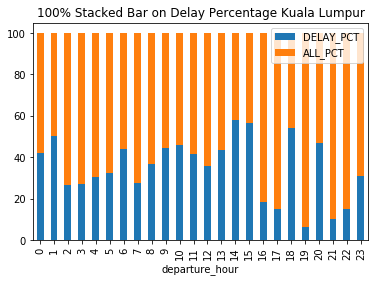

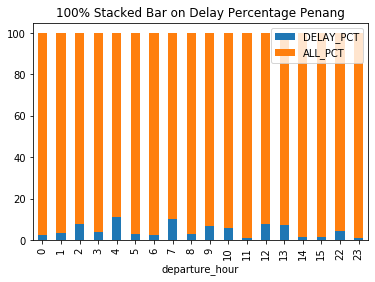

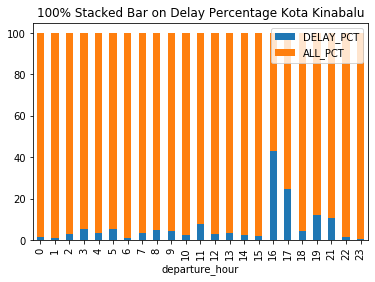

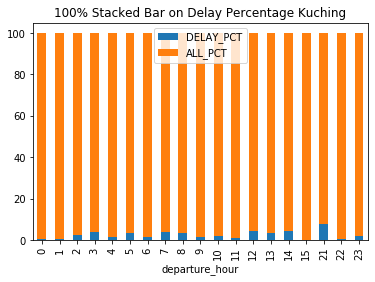

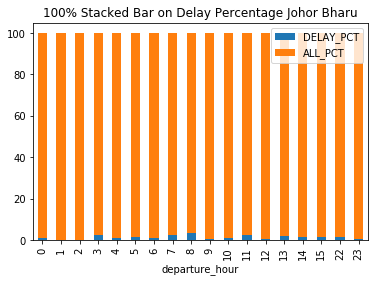

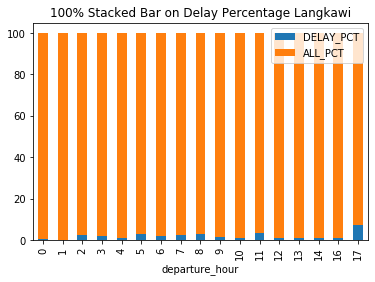

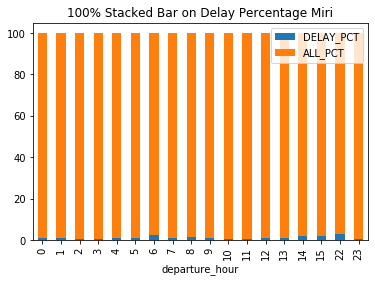

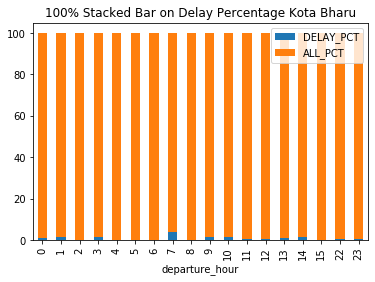

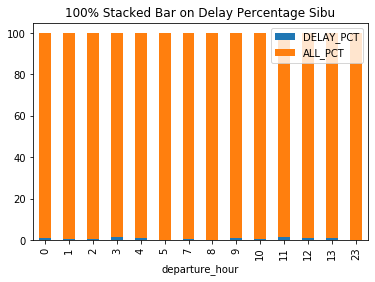

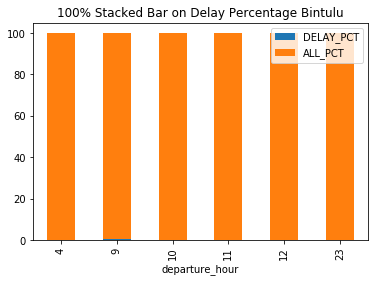

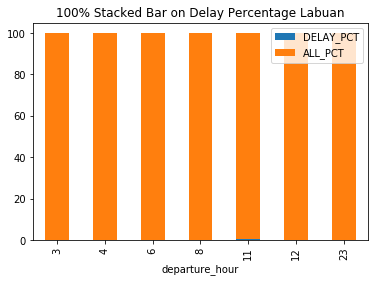

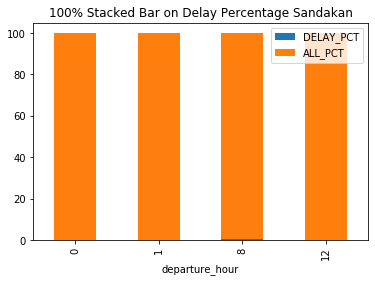

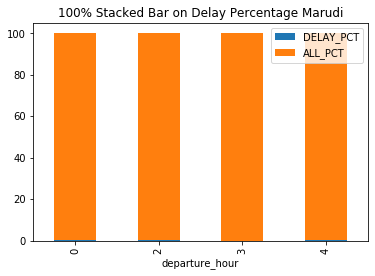

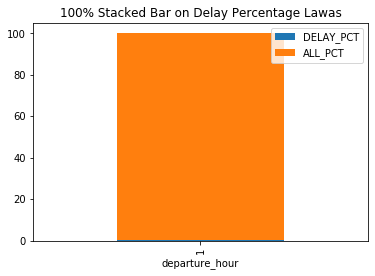

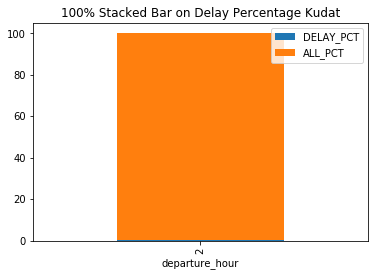

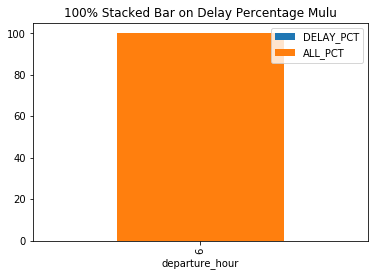

In [12]:
print('Departure time Suggestion based on Departure Airport City:')
for x in df_new_all['departure_airport_city'].value_counts().index:
    df_all_hour= df_new_all[df_new_all.departure_airport_city == x][['departure_hour', 'flag_delay']].groupby('departure_hour').sum()
    df_all_hour['CNT_DELAY'] = df_all_hour['flag_delay'] 
    df_all_hour['CNT_ALL']= df_new_all[['departure_hour', 'flag_delay']].groupby('departure_hour').count()
    df_all_hour.drop(columns=['flag_delay'], axis=1, inplace =True)
    df_all_hour['DELAY_PCT'] = round((df_all_hour['CNT_DELAY']/df_all_hour['CNT_ALL'])*100,2)
    df_all_hour['ALL_PCT']=100-df_all_hour['DELAY_PCT']
    ax = df_all_hour[['DELAY_PCT','ALL_PCT']].plot(kind='bar', stacked=True)
    ax.set_title('100% Stacked Bar on Delay Percentage {}'.format(x))

from above graph, now we knew when is departure time that most likely not having a delay.

In [13]:
print('Top 5 Airline Suggestion based on Departure Airport City:')
for x in df_new_all['departure_airport_city'].value_counts().index:
    print('Departure City: ', x)
    df_all_airline= df_new_all[df_new_all.departure_airport_city == x][['airline_name', 'flag_delay']].groupby('airline_name').sum()
    df_all_airline['CNT_DELAY'] = df_all_airline['flag_delay'] 
    df_all_airline['CNT_ALL']= df_new_all[['airline_name', 'flag_delay']].groupby('airline_name').count()
    df_all_airline.drop(columns=['flag_delay'], axis=1, inplace =True)
    df_all_airline['DELAY_PCT'] = round((df_all_airline['CNT_DELAY']/df_all_airline['CNT_ALL'])*100,2)
    df_all_airline['ALL_PCT']=100-df_all_airline['DELAY_PCT']
#     ax = df_all_hour[['DELAY_PCT','ALL_PCT']].plot(kind='bar', stacked=True)
#     ax.set_title('100% Stacked Bar on Delay Percentage {}'.format(x))
    display(df_all_airline.sort_values(by='ALL_PCT', ascending= False).head(5))

Top 5 Airline Suggestion based on Departure Airport City:
Departure City:  Kuala Lumpur


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Silk Way West,0,20,0.0,100.0
YTO Cargo,0,38,0.0,100.0
Hong Kong Airlines,0,22,0.0,100.0
Guangxi Beibu Gulf Airlines,0,36,0.0,100.0
Firefly,0,6223,0.0,100.0


Departure City:  Penang


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Firefly,0,6223,0.00,100.00
Philippine Airlines,60,2992,2.01,97.99
Malaysia Airlines,708,31608,2.24,97.76
Garuda Indonesia,49,1765,2.78,97.22
Oman Air,81,2432,3.33,96.67


Departure City:  Kota Kinabalu


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Raya Airways,0,367,0.00,100.00
Royal Brunei Airlines,12,1267,0.95,99.05
KLM,40,3017,1.33,98.67
Thai AirAsia,9,628,1.43,98.57
Oman Air,43,2432,1.77,98.23


Departure City:  Kuching


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Raya Airways,0,367,0.00,100.00
Garuda Indonesia,17,1765,0.96,99.04
JAL,29,1719,1.69,98.31
Oman Air,43,2432,1.77,98.23
Malaysia Airlines,569,31608,1.80,98.20


Departure City:  Johor Bharu


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Firefly,0,6223,0.00,100.00
Malaysia Airlines,115,31608,0.36,99.64
Philippine Airlines,31,2992,1.04,98.96
Air Mauritius,8,638,1.25,98.75
Qatar Airways,110,8251,1.33,98.67


Departure City:  Langkawi


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Firefly,0,6223,0.00,100.00
Malaysia Airlines,197,31608,0.62,99.38
Oman Air,16,2432,0.66,99.34
Garuda Indonesia,17,1765,0.96,99.04
SriLankan Airlines,22,1728,1.27,98.73


Departure City:  Miri


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
KLM,16,3017,0.53,99.47
Philippine Airlines,34,2992,1.14,98.86
Oman Air,28,2432,1.15,98.85
Qatar Airways,101,8251,1.22,98.78
Emirates,102,8206,1.24,98.76


Departure City:  Kota Bharu


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Firefly,0,6223,0.00,100.00
Malaysia Airlines,109,31608,0.34,99.66
AirAsia,423,34868,1.21,98.79
Qatar Airways,109,8251,1.32,98.68
Emirates,109,8206,1.33,98.67


Departure City:  Sibu


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Emirates,23,8206,0.28,99.72
Philippine Airlines,23,2992,0.77,99.23
Garuda Indonesia,18,1765,1.02,98.98
Malaysia Airlines,374,31608,1.18,98.82
AirAsia,537,34868,1.54,98.46


Departure City:  Bintulu


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Malaysia Airlines,71,31608,0.22,99.78


Departure City:  Labuan


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Malaysia Airlines,114,31608,0.36,99.64


Departure City:  Sandakan


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Malaysia Airlines,60,31608,0.19,99.81


Departure City:  Marudi


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Malaysia Airlines,12,31608,0.04,99.96


Departure City:  Lawas


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Malaysia Airlines,9,31608,0.03,99.97


Departure City:  Kudat


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Malaysia Airlines,15,31608,0.05,99.95


Departure City:  Mulu


,CNT_DELAY,CNT_ALL,DELAY_PCT,ALL_PCT
airline_name,,,,
Malaysia Airlines,0,31608,0.0,100.0


##### Correlation between the features:

In [14]:
df_model = df_new_all.copy()


for column in df_model:
    df_model[column] = df_model[column].astype('category').cat.codes
    
    
df_model.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_name,...,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flag_delay,flag_weekend,month_depart,departure_hour,flight_name
0,0,496,13,11,213,213,4,6,0,2,...,13,6,5,428,2,1,0,0,22,1
1,1,1198,45,18,213,213,4,6,0,2,...,9,6,5,199,8,1,0,0,22,1
2,2,2097,65,62,213,213,4,6,0,2,...,9,6,5,199,8,1,0,0,22,1
3,3,234,13,11,214,214,4,6,0,2,...,13,6,5,269,0,0,0,0,22,1
4,4,227,13,11,215,215,4,6,0,2,...,7,6,5,298,0,0,0,0,22,1


,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_name,...,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flag_delay,flag_weekend,month_depart,departure_hour,flight_name
id,1.000000,-0.001150,-0.001399,-0.004483,0.999611,0.999611,-0.003492,-0.004691,NaN,0.002580,...,-0.007231,0.003416,-0.001020,0.009063,0.104921,0.113110,-0.016374,0.937797,0.009021,-0.005173
number,-0.001150,1.000000,0.978946,0.790299,-0.000279,-0.000279,0.002426,0.086792,NaN,0.022520,...,0.050597,0.346562,0.359231,-0.014452,-0.004300,0.094235,0.003527,-0.000074,-0.080893,0.204785
airline,-0.001399,0.978946,1.000000,0.818668,-0.000490,-0.000490,0.004275,0.071701,NaN,0.007554,...,0.069254,0.356476,0.371392,0.012588,-0.009215,0.090987,0.003413,-0.000423,-0.076547,0.211219
airline_name,-0.004483,0.790299,0.818668,1.000000,-0.003374,-0.003374,0.013000,0.082145,NaN,0.022004,...,0.084203,0.386917,0.376053,-0.015297,-0.023772,0.070394,0.007988,-0.003288,-0.091213,0.218166
scheduled_departure_time,0.999611,-0.000279,-0.000490,-0.003374,1.000000,1.000000,-0.008504,-0.008984,NaN,-0.007511,...,-0.005609,-0.001103,0.003351,0.012797,0.108041,0.118210,-0.015094,0.937678,0.003484,-0.000269
scheduled_arrival_time,0.999611,-0.000279,-0.000490,-0.003374,1.000000,1.000000,-0.008504,-0.008984,NaN,-0.007511,...,-0.005609,-0.001103,0.003351,0.012797,0.108041,0.118210,-0.015094,0.937678,0.003484,-0.000269
departure_airport_city,-0.003492,0.002426,0.004275,0.013000,-0.008504,-0.008504,1.000000,0.669321,NaN,0.424095,...,-0.005020,0.070920,-0.065761,-0.126702,-0.014253,-0.059910,0.007068,-0.007742,-0.012013,-0.060249
departure_airport_code,-0.004691,0.086792,0.071701,0.082145,-0.008984,-0.008984,0.669321,1.000000,NaN,0.639739,...,-0.009108,0.353526,-0.193887,-0.205851,-0.050087,-0.109149,0.006812,-0.009005,-0.003437,-0.307960
departure_airport_country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_airport_name,0.002580,0.022520,0.007554,0.022004,-0.007511,-0.007511,0.424095,0.639739,NaN,1.000000,...,-0.062606,0.457859,-0.343027,-0.287157,-0.097667,-0.229185,0.000967,-0.007520,0.026060,-0.461547


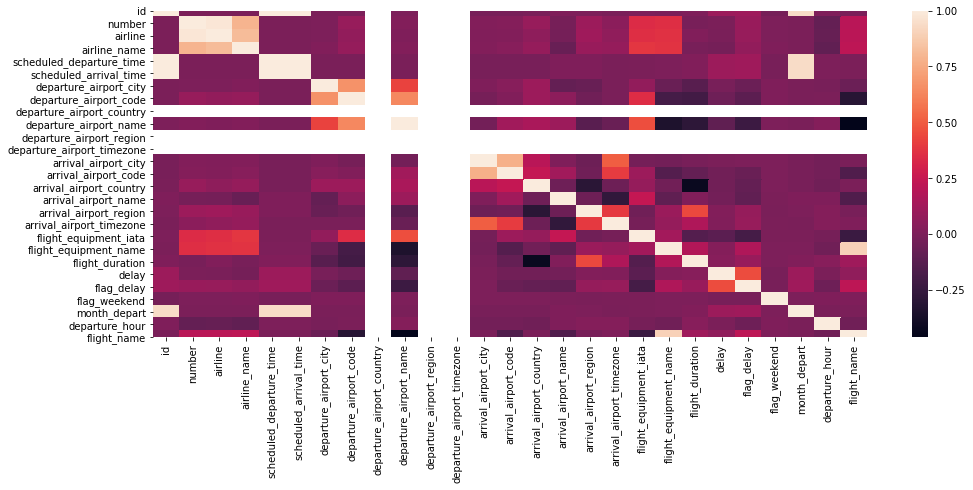

In [15]:
import matplotlib.pyplot as plt

corr = df_model.corr()

plt.figure(figsize=(16, 6))

sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels=corr.columns.values
           )

display(corr)

## <u>Section 4: Modelling</u>

##### Splitting Train and Test Dataset

In [16]:
df_train = df_train[['id']].merge(df_new_all,left_on='id', right_on='id')
df_test = df_test[['id']].merge(df_new_all,left_on='id', right_on='id')

In [17]:
x_train = df_train[['month_depart']].values.reshape(-1,1)
y_train = df_train['delay'].values.reshape(-1,1)
x_test = df_test[['month_depart']].values.reshape(-1,1)
y_test = df_test['delay'].values.reshape(-1,1)

#### Linear Regression

In [18]:
# import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
#for option 1
regression = LinearRegression()

In [20]:
regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# get the predicted from regressions model for train&test dataset
y_pred_train = regression.predict(x_train)
y_pred = regression.predict(x_test)

Model Validation

In [22]:
#mean square
print(mean_squared_error(y_pred, y_test))
print('mse test = {}'.format(mean_squared_error(y_pred, y_test)))
print('mse train = {}'.format(mean_squared_error(y_pred_train, y_train)))

974.7227621118142
mse test = 974.7227621118142
mse train = 716.9553321238624


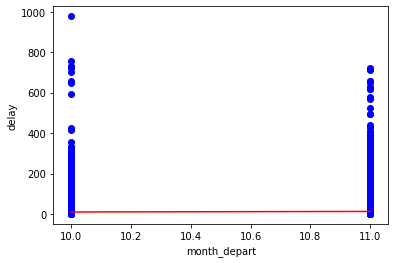

In [23]:
plt.scatter(x_train, y_train, c='blue')
plt.plot(x_train, y_pred_train, c='red')
plt.xlabel('month_depart')
plt.ylabel('delay')
plt.show()

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# import splitting data
from sklearn.model_selection import train_test_split

In [25]:
df_prepare = df_new_all.copy()

target = df_prepare['delay']
temp = df_prepare.drop(['delay'], axis=1)

dataset_dummies = temp.select_dtypes(exclude=['int','int64','float64'])
dataset_int = temp.select_dtypes(include=['int','int64','float64'])
# dummy variable
dataset_dummies_2 = pd.get_dummies(dataset_dummies, drop_first=True)

df_model = pd.concat([dataset_int, dataset_dummies_2, target], axis= 1)

x = df_model.iloc[:,0:len(df_model.columns)-1]
y = df_model.iloc[:,len(df_model.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
sc = StandardScaler()

In [27]:
x_train.drop(columns=['scheduled_departure_time','scheduled_arrival_time'], axis=1, inplace=True)
x_test.drop(columns=['scheduled_departure_time','scheduled_arrival_time'], axis=1, inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
Logistic_Regression = LogisticRegression()

In [ ]:
# Logistic_Regression.fit(x_train, y_train)

# y_pred_test = Logistic_Regression.predict(x_test)
# y_pred_train = Logistic_Regression.predict(x_train)

In [ ]:
from sklearn.metrics import auc, confusion_matrix, classification_report
from sklearn import metrics

cm = confusion_matrix(y_train, y_pred_train)
print(cm)
good_prediction = cm[0][0]+cm[1][1]
total_prediction = cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]
print('Accuracy: ', (good_prediction/total_prediction)*100, '%')

In [ ]:
y_pred_train

## <u>Section 5: Conclusion</u>

Did you do some feature engineering on the dataset ? if yes, please give the reason for each feature you created